In [1]:
import random

import matplotlib.pyplot as plt

from base_rl.callbacks import SaveBestPolicy, SavePolicyOnTrainingEnd, SavePolicyXInterval
from base_rl.scheduler import DecayingExpContinuousScheduler
from base_rl.train import ParallelTrainer, OnlineTrainer
from envs.env_creator import env_creator
from q_learning.algorithm import QLearningAlgo

In [2]:
plt.rcParams["figure.figsize"] = [20, 12]
fixed_digits = 6

In [ ]:
# parameters

device = 'cuda'
root_path = 'tmp'
total_epochs = 6000
model_name = 'model_aeq-20bits4'
initial_alpha = 0.9
alpha_decay = 0.999
initial_epsilon = 1.0
epsilon_decay = 0.999
log_dir = 'runs'

alpha


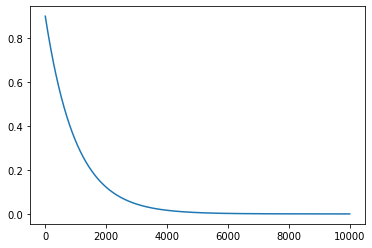

epsilon


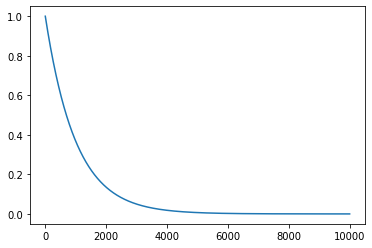

In [4]:
steps_per_episode = 1000
gamma = 0.995
print('alpha')
alpha = DecayingExpContinuousScheduler(start=initial_alpha, decay=alpha_decay)
print('epsilon')
epsilon = DecayingExpContinuousScheduler(start=initial_epsilon, decay=epsilon_decay)

In [5]:
import os

env_kwargs = {'steps_per_episode': steps_per_episode, 'device': device,
              'model_path': os.path.join(root_path, 'state_quantization', model_name)}
best_save_path = os.path.join(root_path, 'q_learning', model_name, 'best_policy.pkl')
last_save_path = os.path.join(root_path, 'q_learning', model_name, 'last_save_policy.pkl')
x_interval_save_path = os.path.join(root_path, 'q_learning', model_name, 'x_interval_policy.pkl')


In [ ]:

algo = QLearningAlgo(
    comment=f',type=q_learning,model={model_name},gamma={gamma},total_epochs={total_epochs}',
    epochs=total_epochs, alpha=alpha, gamma=gamma, epsilon=epsilon, env_creator=env_creator,
    env_kwargs=env_kwargs, reward_offset=2000, show_reward_type='mean', initial_q_value=0,
    log_dir=log_dir
)
callbacks = [
    SaveBestPolicy(save_path=best_save_path),
    SavePolicyOnTrainingEnd(save_path=last_save_path),
    SavePolicyXInterval(x_interval_save_path)
]
trainer = OnlineTrainer(algo=algo,callbacks=callbacks)
trainer.fit()